In [85]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews
import pandas as pd
import numpy as np

In [86]:
from IPython.display import Image 
Image(url="silver-wolf.jpg", width=300, height=400) 

In [87]:
result, continuation_token = reviews(
    'com.HoYoverse.hkrpgoversea',
    lang='id',  
    country='id', 
    sort=Sort.NEWEST,
    count=1000, 
)

In [88]:
data = pd.DataFrame(np.array(result),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9d8514ac-66a5-45eb-a443-deba9ea5b38f,Jovanny Mudita Suherman,https://play-lh.googleusercontent.com/a-/ALV-U...,Sudah bagus permainannya dan plg sesuai untuk ...,5,0,2.0.0,2024-03-27 21:08:43,None,NaT,2.0.0
1,e7fe32a4-a150-413b-b70b-d940029fd7ec,white holy,https://play-lh.googleusercontent.com/a/ACg8oc...,tolong adakan fitur skip,2,0,None,2024-03-27 21:01:35,None,NaT,None
2,b4ac7ced-347a-4f3e-ad99-723ff7a4ba6b,Erlan Sakty,https://play-lh.googleusercontent.com/a/ACg8oc...,"Acheron grafik nya keren bangt bro,yg tdk down...",5,0,2.0.0,2024-03-27 20:43:41,None,NaT,2.0.0
3,a789acaf-fd0e-4d8f-a5a9-5b20d9dd49e9,Mi Kuitsu,https://play-lh.googleusercontent.com/a-/ALV-U...,MAKASIH BANSOSNYA!!,5,0,2.0.0,2024-03-27 20:37:03,None,NaT,2.0.0
4,712d74dd-8e7c-4ef0-8518-2d4d2627f746,zaka _,https://play-lh.googleusercontent.com/a-/ALV-U...,Rekomen!! F2P frendly... Semoga menang rate of...,5,0,2.0.0,2024-03-27 20:31:50,None,NaT,2.0.0


In [89]:
len(data.index) 

398

In [90]:
data[['userName', 'score','at', 'content']].head()  

,userName,score,at,content
0,Jovanny Mudita Suherman,5,2024-03-27 21:08:43,Sudah bagus permainannya dan plg sesuai untuk ...
1,white holy,2,2024-03-27 21:01:35,tolong adakan fitur skip
2,Erlan Sakty,5,2024-03-27 20:43:41,"Acheron grafik nya keren bangt bro,yg tdk down..."
3,Mi Kuitsu,5,2024-03-27 20:37:03,MAKASIH BANSOSNYA!!
4,zaka _,5,2024-03-27 20:31:50,Rekomen!! F2P frendly... Semoga menang rate of...


In [91]:
new_data = data[['userName', 'score','at', 'content']]
sorted_data = new_data.sort_values(by='at', ascending=False) 
sorted_data.head()

,userName,score,at,content
0,Jovanny Mudita Suherman,5,2024-03-27 21:08:43,Sudah bagus permainannya dan plg sesuai untuk ...
1,white holy,2,2024-03-27 21:01:35,tolong adakan fitur skip
2,Erlan Sakty,5,2024-03-27 20:43:41,"Acheron grafik nya keren bangt bro,yg tdk down..."
3,Mi Kuitsu,5,2024-03-27 20:37:03,MAKASIH BANSOSNYA!!
4,zaka _,5,2024-03-27 20:31:50,Rekomen!! F2P frendly... Semoga menang rate of...


In [92]:
data = sorted_data[['userName', 'score','at', 'content']] 

In [93]:
data=data[['content', 'score']]

In [94]:
data.head()

,content,score
0,Sudah bagus permainannya dan plg sesuai untuk ...,5
1,tolong adakan fitur skip,2
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5
3,MAKASIH BANSOSNYA!!,5
4,Rekomen!! F2P frendly... Semoga menang rate of...,5


## Labelling Data

In [95]:
def labelled(score):
  if score <= 3:
    return 'Negative'
  elif score == 4 or score == 5:
    return 'Positive'

data['Label'] = data ['score'].apply(labelled)
data.head(50)

,content,score,Label
0,Sudah bagus permainannya dan plg sesuai untuk ...,5,Positive
1,tolong adakan fitur skip,2,Negative
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5,Positive
3,MAKASIH BANSOSNYA!!,5,Positive
4,Rekomen!! F2P frendly... Semoga menang rate of...,5,Positive
5,"updatee macam apaa inii, udahlah lawan boss ju...",1,Negative
6,mau gua bintang 5 tapi pas gua ganti grafik ra...,4,Positive
7,Rpg turnbase yang paling oke sih sejauh ini mu...,5,Positive
8,Gila cuy ternya gak story nya aja yang banyak ...,5,Positive
9,Best!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,5,Positive


In [96]:
data.to_csv("hsr.csv", index = False) 

In [97]:
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv('hsr.csv')
data.head(50)

,content,score,Label
0,Sudah bagus permainannya dan plg sesuai untuk ...,5,Positive
1,tolong adakan fitur skip,2,Negative
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5,Positive
3,MAKASIH BANSOSNYA!!,5,Positive
4,Rekomen!! F2P frendly... Semoga menang rate of...,5,Positive
5,"updatee macam apaa inii, udahlah lawan boss ju...",1,Negative
6,mau gua bintang 5 tapi pas gua ganti grafik ra...,4,Positive
7,Rpg turnbase yang paling oke sih sejauh ini mu...,5,Positive
8,Gila cuy ternya gak story nya aja yang banyak ...,5,Positive
9,Best!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,5,Positive


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  398 non-null    object
 1   score    398 non-null    int64 
 2   Label    398 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [99]:
data.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
393,False,False,False
394,False,False,False
395,False,False,False
396,False,False,False


In [100]:
data.isna().any()

content    False
score      False
Label      False
dtype: bool

In [101]:
data.describe()

,score
count,398.000000
mean,4.273869
std,1.411672
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [102]:
data.isnull().sum()  

content    0
score      0
Label      0
dtype: int64

In [103]:
data.dropna(subset=['Label'],inplace = True)

In [104]:
data.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [105]:
data.head(50)

,content,score,Label
0,Sudah bagus permainannya dan plg sesuai untuk ...,5,Positive
1,tolong adakan fitur skip,2,Negative
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5,Positive
3,MAKASIH BANSOSNYA!!,5,Positive
4,Rekomen!! F2P frendly... Semoga menang rate of...,5,Positive
5,"updatee macam apaa inii, udahlah lawan boss ju...",1,Negative
6,mau gua bintang 5 tapi pas gua ganti grafik ra...,4,Positive
7,Rpg turnbase yang paling oke sih sejauh ini mu...,5,Positive
8,Gila cuy ternya gak story nya aja yang banyak ...,5,Positive
9,Best!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,5,Positive


In [106]:
data.to_csv("hsr_preprocessing.csv", index = False) 

In [107]:
import pandas as pd
df = pd.read_csv('hsr_preprocessing.csv')
df.head(50)

,content,score,Label
0,Sudah bagus permainannya dan plg sesuai untuk ...,5,Positive
1,tolong adakan fitur skip,2,Negative
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5,Positive
3,MAKASIH BANSOSNYA!!,5,Positive
4,Rekomen!! F2P frendly... Semoga menang rate of...,5,Positive
5,"updatee macam apaa inii, udahlah lawan boss ju...",1,Negative
6,mau gua bintang 5 tapi pas gua ganti grafik ra...,4,Positive
7,Rpg turnbase yang paling oke sih sejauh ini mu...,5,Positive
8,Gila cuy ternya gak story nya aja yang banyak ...,5,Positive
9,Best!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,5,Positive


## Remove punc

In [108]:
import re
def  clean_text(df, text_field, new_text_field_name):
    data[new_text_field_name] = data[text_field].str.lower()
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem)) 
    return data

In [109]:
data['text_clean'] = data['content'].str.lower()
data['text_clean']
clean_data = clean_text(data, 'content', 'text_clean')
clean_data.head(50)

,content,score,Label,text_clean
0,Sudah bagus permainannya dan plg sesuai untuk ...,5,Positive,sudah bagus permainannya dan plg sesuai untuk ...
1,tolong adakan fitur skip,2,Negative,tolong adakan fitur skip
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5,Positive,acheron grafik nya keren bangt broyg tdk downl...
3,MAKASIH BANSOSNYA!!,5,Positive,makasih bansosnya
4,Rekomen!! F2P frendly... Semoga menang rate of...,5,Positive,rekomen fp frendly semoga menang rate off bann...
5,"updatee macam apaa inii, udahlah lawan boss ju...",1,Negative,updatee macam apaa inii udahlah lawan boss jud...
6,mau gua bintang 5 tapi pas gua ganti grafik ra...,4,Positive,mau gua bintang tapi pas gua ganti grafik rat...
7,Rpg turnbase yang paling oke sih sejauh ini mu...,5,Positive,rpg turnbase yang paling oke sih sejauh ini mu...
8,Gila cuy ternya gak story nya aja yang banyak ...,5,Positive,gila cuy ternya gak story nya aja yang banyak ...
9,Best!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,5,Positive,best


## Stopwords

In [110]:
import nltk.corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')
clean_data['text_StopWord'] = clean_data['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
clean_data.head(50)


,content,score,Label,text_clean,text_StopWord
0,Sudah bagus permainannya dan plg sesuai untuk ...,5,Positive,sudah bagus permainannya dan plg sesuai untuk ...,sudah bagus permainannya dan plg sesuai untuk ...
1,tolong adakan fitur skip,2,Negative,tolong adakan fitur skip,tolong adakan fitur skip
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5,Positive,acheron grafik nya keren bangt broyg tdk downl...,acheron grafik nya keren bangt broyg tdk downl...
3,MAKASIH BANSOSNYA!!,5,Positive,makasih bansosnya,makasih bansosnya
4,Rekomen!! F2P frendly... Semoga menang rate of...,5,Positive,rekomen fp frendly semoga menang rate off bann...,rekomen fp frendly semoga menang rate banner a...
5,"updatee macam apaa inii, udahlah lawan boss ju...",1,Negative,updatee macam apaa inii udahlah lawan boss jud...,updatee macam apaa inii udahlah lawan boss jud...
6,mau gua bintang 5 tapi pas gua ganti grafik ra...,4,Positive,mau gua bintang tapi pas gua ganti grafik rat...,mau gua bintang tapi pas gua ganti grafik rata...
7,Rpg turnbase yang paling oke sih sejauh ini mu...,5,Positive,rpg turnbase yang paling oke sih sejauh ini mu...,rpg turnbase yang paling oke sih sejauh ini mu...
8,Gila cuy ternya gak story nya aja yang banyak ...,5,Positive,gila cuy ternya gak story nya aja yang banyak ...,gila cuy ternya gak story nya aja yang banyak ...
9,Best!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,5,Positive,best,best


## Tokenization

In [111]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
clean_data['text_tokens'] = clean_data['text_StopWord'].apply(lambda x: word_tokenize(x))
clean_data.head()

,content,score,Label,text_clean,text_StopWord,text_tokens
0,Sudah bagus permainannya dan plg sesuai untuk ...,5,Positive,sudah bagus permainannya dan plg sesuai untuk ...,sudah bagus permainannya dan plg sesuai untuk ...,"[sudah, bagus, permainannya, dan, plg, sesuai,..."
1,tolong adakan fitur skip,2,Negative,tolong adakan fitur skip,tolong adakan fitur skip,"[tolong, adakan, fitur, skip]"
2,"Acheron grafik nya keren bangt bro,yg tdk down...",5,Positive,acheron grafik nya keren bangt broyg tdk downl...,acheron grafik nya keren bangt broyg tdk downl...,"[acheron, grafik, nya, keren, bangt, broyg, td..."
3,MAKASIH BANSOSNYA!!,5,Positive,makasih bansosnya,makasih bansosnya,"[makasih, bansosnya]"
4,Rekomen!! F2P frendly... Semoga menang rate of...,5,Positive,rekomen fp frendly semoga menang rate off bann...,rekomen fp frendly semoga menang rate banner a...,"[rekomen, fp, frendly, semoga, menang, rate, b..."


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data['content'], clean_data['Label'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(318,)
(318,)
(80,)
(80,)


In [115]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [116]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [117]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)


MultinomialNB()

In [118]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [119]:
y_pred = nb.predict(tfidf_test)


In [120]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [121]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [122]:
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, predicted)
precision_negative = precision_score(y_test, predicted, average='binary', pos_label='Negative')
recall_negative = recall_score(y_test, predicted, average='binary', pos_label='Negative')
f1_negative = f1_score(y_test, predicted, average='binary', pos_label='Negative')
precision_positive = precision_score(y_test, predicted, average='binary', pos_label='Positive')
recall_positive = recall_score(y_test, predicted, average='binary', pos_label='Positive')
f1_positive = f1_score(y_test, predicted, average='binary', pos_label='Positive')

In [126]:
print(classification_report(y_test, predicted, zero_division=0))

              precision    recall  f1-score   support

    Negative       0.30      0.25      0.27        12
    Positive       0.87      0.90      0.88        68

    accuracy                           0.80        80
   macro avg       0.59      0.57      0.58        80
weighted avg       0.79      0.80      0.79        80



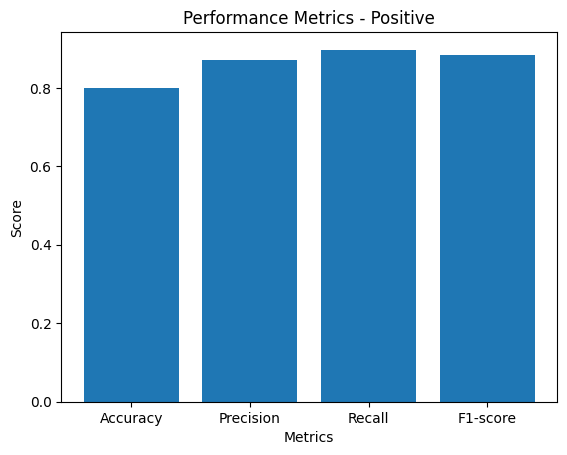

In [123]:
metrics_positive = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values_positive = [accuracy, precision_positive, recall_positive, f1_positive]

plt.bar(metrics_positive, values_positive)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics - Positive')
plt.show()

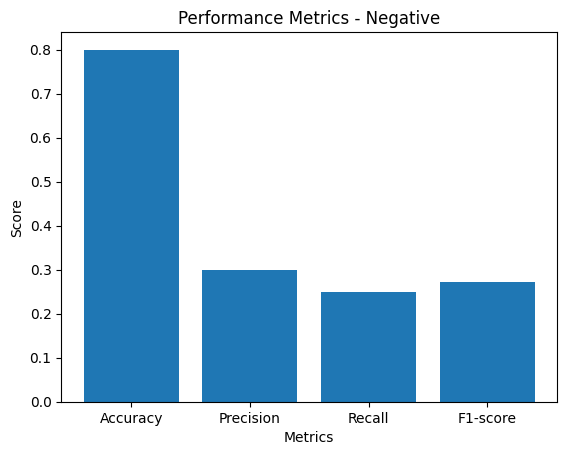

In [124]:
metrics_negative = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values_negative = [accuracy, precision_negative, recall_negative, f1_negative]

plt.bar(metrics_negative, values_negative)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics - Negative')
plt.show()